   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  iris_name  
0    setosa  
1    setosa  
2    setosa  
3    setosa  
4    setosa  
Accuracy: 0.93
Best hyperparameters: {'max_depth': 4}


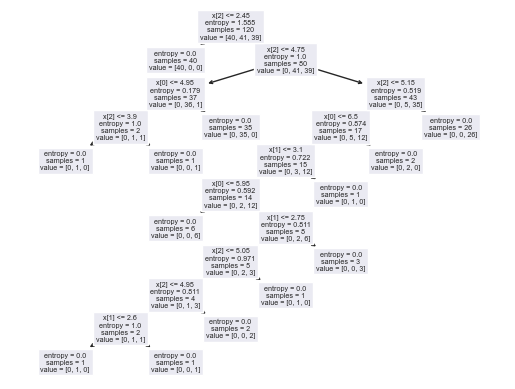

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

df_iris = pd.read_csv('iris_teach_2.csv')
print(df_iris.head())
empty_cells = df_iris.isnull().sum()
df_iris.dropna(inplace=True)
X = df_iris.drop('iris_name', axis=1)
X = X.drop('petal width (cm)', axis=1)
y = df_iris['iris_name']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
plot_tree(tree_clf)
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]}
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
#
# tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=grid_search.best_params_['max_depth'], random_state=42)
# tree_clf_tuned.fit(X_train, y_train)
# plot_tree(tree_clf_tuned)
